In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Прочитайте csv файл (використовуйте функцію read_csv)
books = pd.read_csv('bestsellers with categories.csv')
books

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [4]:
# Виведіть перші п'ять рядків (використовується функція head)
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [6]:
# Виведіть розміри датасету (використовуйте атрибут shape)
books.shape

(550, 7)

In [5]:
name_duplicates = books['Name'].duplicated()
total_rows = len(books)
unique_names = books['Name'].nunique()

result = total_rows - sum(name_duplicates)
print(f"Відповідь: Про скільки книг зберігає дані датасет? {result}")


Відповідь: Про скільки книг зберігає дані датасет? 351


In [8]:
# присвоїти список нових імен атрибуту
books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
books.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [15]:
#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
books.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [16]:
trigger = "Так" if any(books.isna().sum() != 0) else "Ні"
print(f"Відповідь: Чи є в якихось змінних пропуски? {trigger}")


Відповідь: Чи є в якихось змінних пропуски? Ні


In [17]:
#Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
books.genre.unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [18]:
print(f"Відповідь: Які є унікальні жанри? {books.genre.unique()}")

Відповідь: Які є унікальні жанри? ['Non Fiction' 'Fiction']


<Axes: ylabel='Frequency'>

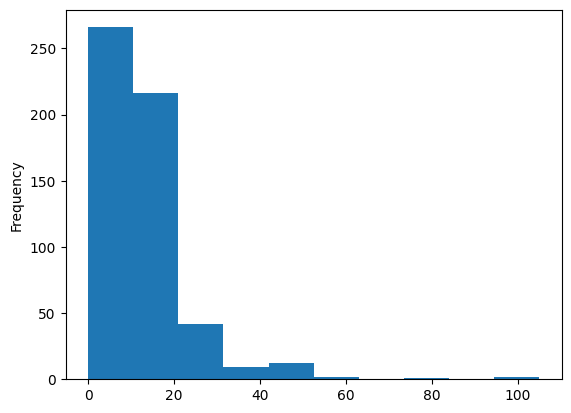

In [19]:
#Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
books.price.plot(kind="hist")

In [20]:
#Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
price = books.agg({'price': ['min', 'max', 'mean', 'median']})
price

,price
min,0.0
max,105.0
mean,13.1
median,11.0


In [21]:
print(f"Відповідь: Максимальна ціна? {price.iloc[1].max()}")


Відповідь: Максимальна ціна? 105.0


In [22]:
print(f"Відповідь: Мінімальна ціна? {price.iloc[0].min()}")


Відповідь: Мінімальна ціна? 0.0


In [23]:
print(f"Відповідь: Середня ціна? {price.iloc[2].mean()}")


Відповідь: Середня ціна? 13.1


In [24]:
print(f"Відповідь: Медіанна ціна? {price.iloc[3].median()}")

Відповідь: Медіанна ціна? 11.0


In [26]:
top_rating = books['user_rating'].max()
print(f"Відповідь: Який рейтинг у датасеті найвищий? Відповідь: {top_rating}")


Відповідь: Який рейтинг у датасеті найвищий? Відповідь: 4.9


In [27]:
top_books = books[books.user_rating >= 4.9]
print(f"Відповідь: Скільки книг мають такий рейтинг? Відповідь: {len(top_books)}")

Відповідь: Скільки книг мають такий рейтинг? Відповідь: 52


In [29]:
group_rating = books.groupby('name').size()
book_with_max_reviews = group_rating.idxmax()
max_reviews_count = group_rating.max()

print(f"Відповідь: Яка книга має найбільше відгуків? Відповідь: {book_with_max_reviews}")


Відповідь: Яка книга має найбільше відгуків? Відповідь: Publication Manual of the American Psychological Association, 6th Edition


In [30]:
top_2015 = books[books.year == 2015]
most_expensive_book_2015 = top_2015.sort_values(by='price', ascending=False).iloc[0]

print(f"Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча: {most_expensive_book_2015['name']} з ціною {most_expensive_book_2015['price']}")


Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча: Publication Manual of the American Psychological Association, 6th Edition з ціною 46


In [31]:
top_2010 = books[(books.year == 2010) & (books.genre == 'Fiction')]
print(f"Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: {len(top_2010)}")


Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20


In [32]:
top_2010_2011 = books[(books.user_rating >= 4.9) & ((books.year == 2010) | (books.year == 2011))]
print(f"Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: {len(top_2010_2011)}")

Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1


In [34]:
#відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
sorted_books_2015 = top_2015[top_2015.price <= 8].sort_values(by='price', ascending=True)
sorted_books_2015


,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
224,Love You Forever,Robert Munsch,4.8,18613,5,2015,Fiction
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction


In [35]:
print(f"Відповідь: Яка книга остання у відсортованому списку? Відповідь: {sorted_books_2015.tail(1)}")

Відповідь: Яка книга остання у відсортованому списку? Відповідь:                                                   name       author  \
191  Jesus Calling: Enjoying Peace in His Presence ...  Sarah Young   

     user_rating  reviews  price  year        genre  
191          4.9    19576      8  2015  Non Fiction  


In [36]:
# максимальна та мінімальна ціна для кожного з жанрів (використовуйте функції groupby та agg, 
# для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам
result = books.groupby("genre").agg({"price": ["min", "max"]})
result

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

In [37]:
print(f"Відповідь: Максимальна ціна для жанру Fiction: Відповідь {result.iloc[0]['price']['max']}")
print(f"Відповідь: Мінімальна ціна для жанру Fiction: Відповідь {result.iloc[0]['price']['min']}")
print(f"Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь {result.iloc[1]['price']['max']}")
print(f"Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь {result.iloc[1]['price']['min']}")

Відповідь: Максимальна ціна для жанру Fiction: Відповідь 82
Відповідь: Мінімальна ціна для жанру Fiction: Відповідь 0
Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь 105
Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь 0


In [38]:
#Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, 
# для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні
new_df = books.groupby("author", as_index=False).agg(cnt = ('author', 'count')).sort_values(by='cnt', ascending=False)
new_df

,author,cnt
120,Jeff Kinney,12
92,Gary Chapman,11
226,Suzanne Collins,11
197,Rick Riordan,11
11,American Psychological Association,10
...,...,...
61,David Grann,1
143,Larry Schweikart,1
62,David McCullough,1
141,Khaled Hosseini,1


In [39]:
print(f"Відповідь: Якої розмірності вийшла таблиця? Відповідь: {new_df.shape}")


Відповідь: Якої розмірності вийшла таблиця? Відповідь: (248, 2)


In [40]:
print(f"Відповідь: Який автор має найбільше книг? Відповідь: {new_df.head(1).iloc[0].author}")


Відповідь: Який автор має найбільше книг? Відповідь: Jeff Kinney


In [41]:
print(f"Відповідь: Скільки книг цього автора? Відповідь: {new_df.iloc[0].cnt}")

Відповідь: Скільки книг цього автора? Відповідь: 12


In [42]:
#Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, 
# для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні
mean_df = books.groupby("author", as_index=False).agg(avg_rating = ('user_rating', 'mean')).sort_values(by='avg_rating', ascending=False)
mean_df

,author,avg_rating
178,Patrick Thorpe,4.9
146,Lin-Manuel Miranda,4.9
41,Chip Gaines,4.9
215,Sherri Duskey Rinker,4.9
173,Nathan W. Pyle,4.9
...,...,...
180,Paula Hawkins,4.1
171,Muriel Barbery,4.0
100,Gillian Flynn,4.0
90,Gallup,4.0


In [43]:
print(f"Відповідь: У якого автора середній рейтинг мінімальний? Відповідь: {mean_df.tail(1).iloc[0].author}")


Відповідь: У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt


In [44]:
print(f"Відповідь: Який у цього автора середній рейтинг? Відповідь: {mean_df.tail(1).iloc[0].avg_rating}")

Відповідь: Який у цього автора середній рейтинг? Відповідь: 3.9


In [45]:
#З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг 
# (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
df_union = pd.concat([new_df, mean_df.avg_rating], axis=1)
df_union

,author,cnt,avg_rating
120,Jeff Kinney,12,4.800000
92,Gary Chapman,11,4.736364
226,Suzanne Collins,11,4.663636
197,Rick Riordan,11,4.772727
11,American Psychological Association,10,4.500000
...,...,...,...
61,David Grann,1,4.600000
143,Larry Schweikart,1,4.600000
62,David McCullough,1,4.700000
141,Khaled Hosseini,1,4.300000


In [46]:
#Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
df_union.sort_values(by=["cnt", "avg_rating"])

,author,cnt,avg_rating
171,Muriel Barbery,1,4.000000
186,Pierre Dukan,1,4.100000
43,Chris Cleave,1,4.100000
109,Ian K. Smith M.D.,1,4.100000
198,Rob Bell,1,4.200000
...,...,...,...
11,American Psychological Association,10,4.500000
226,Suzanne Collins,11,4.663636
92,Gary Chapman,11,4.736364
197,Rick Riordan,11,4.772727


In [47]:
print(f"Відповідь: Який автор перший у списку? {df_union.iloc[0].author}")

Відповідь: Який автор перший у списку? Jeff Kinney


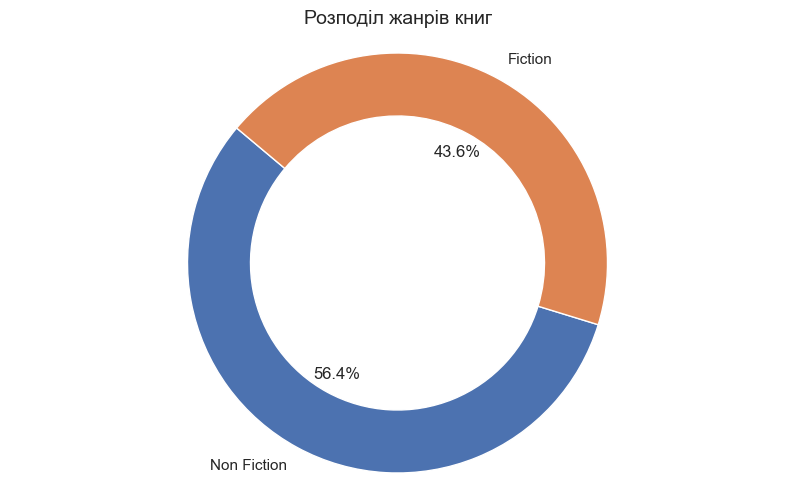

In [48]:
sns.set(style="whitegrid")
genre_counts = books['genre'].value_counts()


plt.figure(figsize=(10, 6))
sns.color_palette("pastel")
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Розподіл жанрів книг', fontsize=14)
plt.axis('equal')  

plt.show()

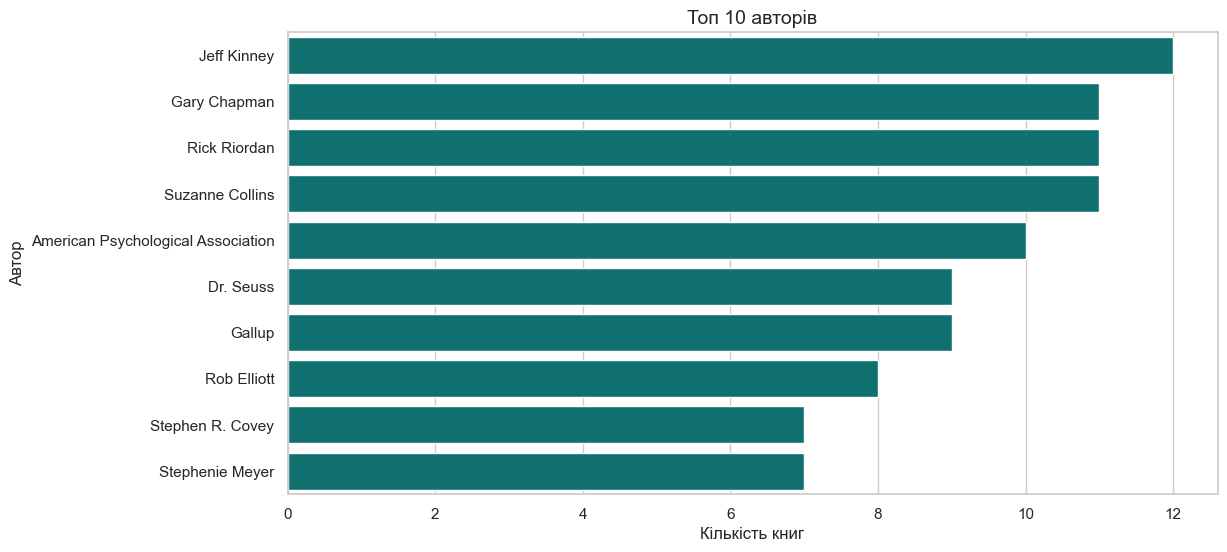

In [50]:
sns.set(style="whitegrid")

top_authors = books["author"].value_counts()[:10]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, color="teal") 
plt.title("Топ 10 авторів", fontsize=14)
plt.xlabel("Кількість книг", fontsize=12)
plt.ylabel("Автор", fontsize=12)

plt.show()


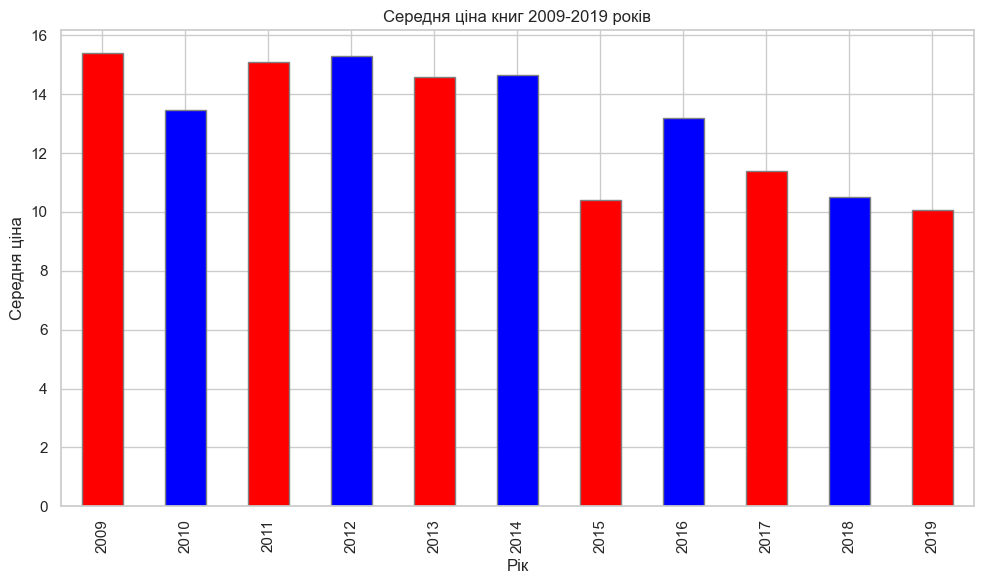

In [53]:
avg_price_per_year = books.groupby("year")["price"].mean()

colors = ['red', 'blue']

plt.figure(figsize=(10, 6))
avg_price_per_year.plot(kind="bar", color=colors, edgecolor="grey", grid=True)
plt.xlabel("Рік")
plt.ylabel("Середня ціна")
plt.title("Середня ціна книг 2009-2019 років")
plt.tight_layout()
plt.show()
